#                                        SAE22_Signal 
##                              Exploring the HD Music

1.Travail Préliminaire

In [189]:
import IPython.display as ipd             #Bibliothèque pour le lecteur audio
from util_TP206 import *
import os
from soundfile import * 
from _soundfile import *

Son = 'NY_HDsample_mini.flac'               #Definition du fichier d'entrée

In [253]:
def LaTotale(Son):

    x, sr = read(Son)                        #Lecture brut du fichier
    piste = x.shape[1]                       #Nombre de piste
    d = len(x) / sr                          #Durée totale du fichier audio
    
    print(info(Son)) # Informations global sur le son
    print(info(Son).format,"\n") # Format du fichier utiliser ici .flac
    print("Le nombre de bits par échantillon est de type ", info(Son).subtype,) # type de son
    print("La fréquence d'échantillonage est de", sr,"Hz" ) # On affiche la Fréquence d'échantillonage
    print("Le nombre de piste est de :", x.shape[1],) #On rleve le nombre de piste
    print("Le nombre d'echantillon est de",len(x),) #Affichage du nombre d'echantillon de l'enregistrement
    print("Le fichier a donc une durée de :",d,"secondes") #Calcul de la durée et affichage en seconde

    T = linspace(0, d, len(x))                #Création d'un vecteur de la durée du signal
    figure(figsize = (17,8))                  #Taille des graphique
    subplots_adjust(hspace = 0.38)            #Gère l'espacement entre les grahps
    i = 0                                     #Une variable qui permet de faire les action sur tout les pistes
    g = 1                                     #Une variable qui permet d'afficher tout les graphs
    for i in range (0, piste):                #Boucle pour réaliser des action sur chacune des pistes
        
        P = x[:,i]                            #Lecture de la  piste i, pour isoler les pistes
        Titre = "Signal d'origine, piste N° " + str(i) # Création du titre des graphiques
        subplot(piste,2,g)                    #Fonction utile au bon déroulement de l'affichage des graphs
        g= g + 1                              #ajout de 1 a cette variable pour le bon déroulement du subplot
        plot(T, P, 'b.--')                    #Graphique 1(Representation Temporelle)
        grid()                                #Affiche la grille des graphs
        title(Titre)                          #Le titre
        xlabel('Temps(secondes)')             
        ylabel('Amplitude')

        subplot(piste,2, g)
        g = g + 1 
        plotSpectreAmplitude(P,sr)            #Graphique 2(Spectre d'Amplitude)
        xlim([-2500, 2500])

NY_HDsample_mini.flac
samplerate: 96000 Hz
channels: 2
duration: 1.259 s
format: FLAC (Free Lossless Audio Codec) [FLAC]
subtype: Signed 24 bit PCM [PCM_24]
FLAC 

Le nombre de bits par échantillon est de type  PCM_24
La fréquence d'échantillonage est de 96000 Hz
Le nombre de piste est de : 2
Le nombre d'echantillon est de 120843
Le fichier a donc une durée de : 1.25878125 secondes


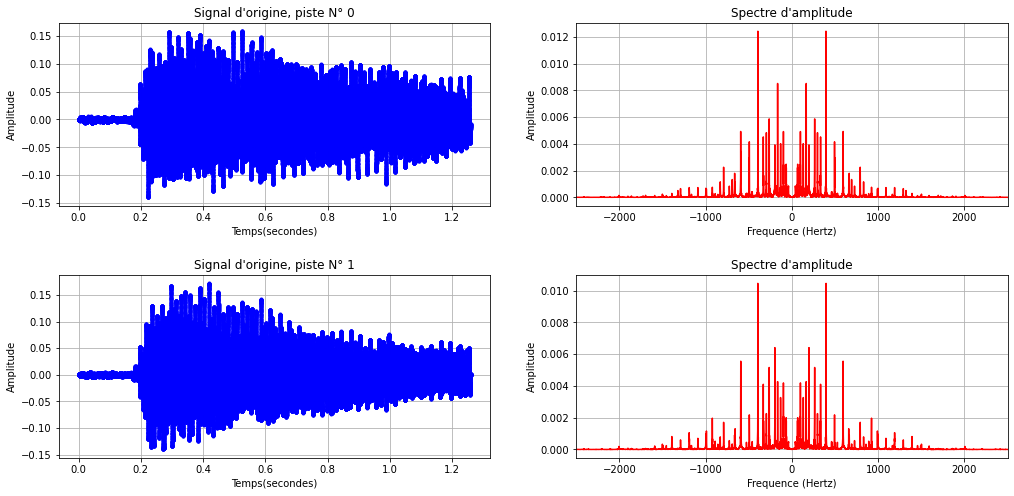

In [254]:
LaTotale(Son)
ipd.Audio(Son)            #Création d'un lecteur audio

In [263]:
def extract(Son, debut, fin): # Fonction poure extraire une durée determinée du fichier audio 
    
    Nom_extrait = input("Nom du fichier qui sera crée (Extrait): \n" )
    v,fs = read(Son)                          #Lire le Son, return les signal des piste et la freq échant
    Se = v[debut*fs:fin*fs]                   #Permet d'extraire la partie du Son de 'debut' sec à 'fin' sec

    piste = Se.shape[1]                       #Nombre de piste
    d = len(Se) / fs                          #Durée totale du fichier audio

    T = linspace(0, d, len(Se))               #Création d'un vecteur de la durée du signal
    figure(figsize = (17,8))                  #Taille des graphique
    subplots_adjust(hspace = 0.38)            #Gère l'espacement entre les grahps
    i = 0                                     #Une variable qui permet de faire les action sur tout les pistes
    g = 1                                     #Une variable qui permet d'afficher tout les graphs
    for i in range (0, piste):                #Boucle pour réaliser des action sur chacune des pistes
        
        Titre = "Signal de l'extrait, piste N° " + str(i)
        P = Se[:,i]                           #Lecture de la  piste i, pour isoler les pistes
        subplot(piste,2,g)                
        g = g + 1
        title(Titre)
        plot(T, P, 'b.--')                    #Graphique 1(Representation Temporelle)
        grid()
        xlabel('Temps(secondes)')
        ylabel('Amplitude')

        subplot(piste,2, g)                   
        g = g + 1
        plotSpectreAmplitude(P,fs)            #Graphique 2(Spectre d'Amplitude)
        xlim([-2500, 2500])

    write(Nom_extrait+'.flac', Se, fs)                           #Créer un Son
    print('\nLe fichier extrait se nomme :',Nom_extrait+'.flac')
    NvSon = Nom_extrait+'.flac'                                  # on stock le nom du nouveau son dans une variable
    print(info(NvSon))                                           # information du nouveau son
    
    return NvSon                                                 # retourne le nouveau son

Nom du fichier qui sera crée (Extrait): 
t

Le fichier extrait se nomme : t.flac
t.flac
samplerate: 96000 Hz
channels: 2
duration: 96000 samples
format: FLAC (Free Lossless Audio Codec) [FLAC]
subtype: Signed 16 bit PCM [PCM_16]
t.flac


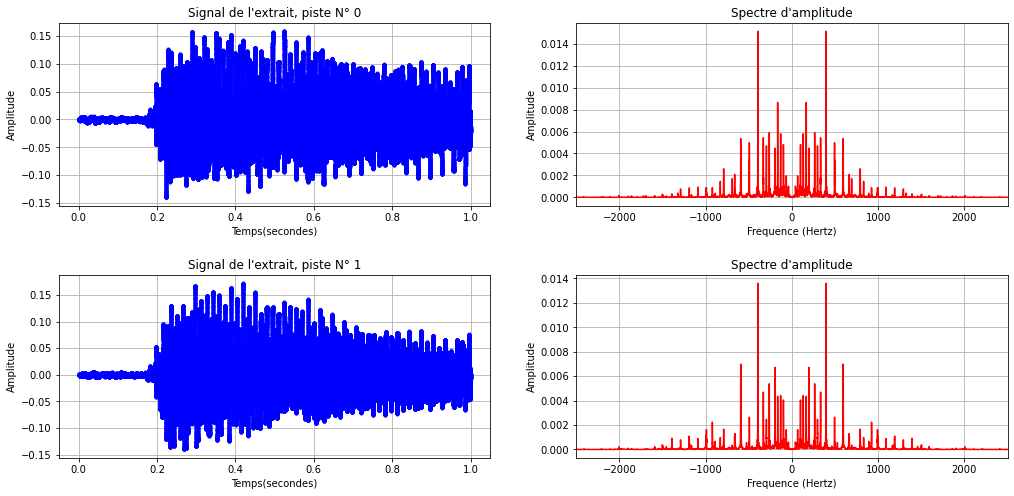

In [264]:
NvSon = extract(Son, 0, 1)
print(NvSon)
ipd.Audio(NvSon)            #Création d'un lecteur audio

In [265]:
def EchantMoins(Son,Fmoins): #Fonction pour echantilloner 
    
    Nom_extrait = input("Nom du fichier qui sera crée (Sous-échantilllonage) : \n" )
    
    infos = info(Son)                              #Informations sur le Son
    v, fs = read(Son)                              #Lire le Son, return les signal des piste et la freq échant
    Nbmoins = int(ceil(len(v)/Fmoins))             #Calcule du nombre d'échantillons à utilisés (arrondie au dessus)
    T = linspace(0,infos.duration,Nbmoins)         #Création d'un vecteur de la durée du signal
    piste = v.shape[1]                             #Nombre de piste
    FS = int(Nbmoins / infos.duration)             #Nouvelle fréquence d'échantillonage
    
    s = np.array([[0, 0]])                         #Création du nouveau signal, ne faites pas attention à 
                                                   #l'initialisation je n'ai pas trouver d'autre méthode qui marche
                                                   #que d'initialiser en mettant une valeur dans l'np.array
            
    for p in range(0,len(v),Fmoins):               #Boucle permettant de récupérer un certains nbr d'échantillons 
                                                   #du signal de base
        s = np.append(s, [[v[p][0], v[p][1]]], 0)  #Ajout des éléments pour créer le signal sous échantillonné
    s = s[1:]                                      #Elimination du première élément à cause de l'initialisation 

        
    figure(figsize = (15,8))                       #Taille des graphiques
    subplots_adjust(hspace = 0.38)                 #Gère l'espacement entre les grahps
    i = 0                                          #Une variable qui permet de faire les action sur tout les pistes
    g = 1                                          #Une variable qui permet d'afficher tout les graphs
    
    print('Echantillons utilisés : ', Nbmoins)     #Affiche le nombre d'échantillons utilisés
    
    for i in range (0, piste):                     #Boucle pour réaliser des action sur chacune des pistes
        
        P = s[:,i]                                 #Lecture de la  piste i, pour isoler les pistes
        Titre = "Signal sous échantilloné, piste N° " + str(i)
        subplot(piste,2,g)
        g = g + 1
        plot(T, P, 'b.--')                         #Graphique 1(Representation Temporelle)
        title(Titre) 
        grid()
        xlabel('Temps (seconde)')
        ylabel('Amplitude')

        subplot(piste,2, g)
        g = g + 1
        plotSpectreAmplitude(P,fs)                 #Graphique 2(Spectre d'Amplitude)
        xlim([-5000, 5000])
    
    write(Nom_extrait+'.flac', s, FS)
    print('Le fichier sous echantilloné se nomme :',Nom_extrait+'.flac')
    NvSon = Nom_extrait + '.flac'
    print(info(NvSon))
    return NvSon
    

Nom du fichier qui sera crée (Sous-échantilllonage) : 
t

 Echantillons utilisés :  30211
Le fichier sous echantilloné se nomme : t.flac
t.flac
samplerate: 24000 Hz
channels: 2
duration: 1.259 s
format: FLAC (Free Lossless Audio Codec) [FLAC]
subtype: Signed 16 bit PCM [PCM_16]
t.flac


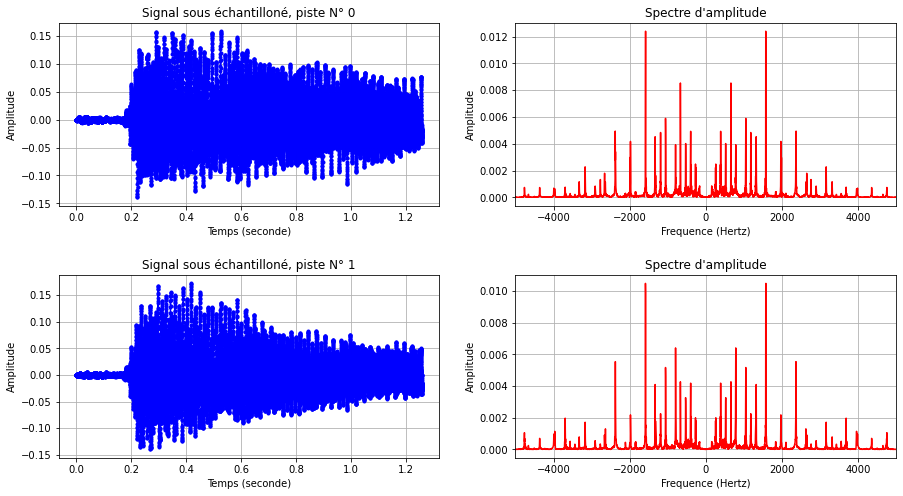

In [267]:
Sous_Ech = EchantsMoins(Son,4) #a essayer avec une valeur plutot grande pour éviter de faire durée l'éxécution
print(Sous_Ech)
ipd.Audio(Sous_Ech)        

In [222]:
def QuantifMoins(Son,Bits): # Fonction pour quantifier le son en diminuant le nombre de bits
    Nom_extrait = input("Nom du fichier qui sera crée (Quantification): " )
    v, fs = read(Son)  
    niv = 2**Bits        #Definition du nombre de niveau du quantificateur
    piste = v.shape[1]   #Stockage du nombre de piste
    t = len(v)/fs        #durée de l'entrée "Son"
    T = arange(0,t,1/fs) #Création du vecteur Temps 
    A = 87.6             #Valeur fixée de la loi A
    g = 1                #definition de la variable pour incrementer a partir de 1
    Max = 0              #definition de la variable pour eviter tout type de conflit
    Min = 0              #definition de la variable pour eviter tout type de conflit
    SNU = np.array([[0, 0]])
    SU = np.array([[0, 0]])
    
    for i in range(0, piste):
        Max = max(v[:,i]) #On prends la valeur maximale de la piste i
        Min = min(v[:,i]) #On prends la valeur minimale de la piste i
    
    #########################SIGNAL NON UNIFORME#############################
    
    uni1 = A_law(v[:,0],A) #On applique une quantification non-uniforme pour permettre une meilleure conversion 
    uni1, pasNU1 = uniform_quantizer(uni1, niv, Min, Max) 
    SNU1 = inverse_A_law(uni1,A)
        
    uni2 = A_law(v[:,1],A) #On applique une quantification non-uniforme pour permettre une meilleure conversion 
    uni2, pasNU1 = uniform_quantizer(uni2, niv, Min, Max) 
    SNU2 = inverse_A_law(uni2,A)
    
    for p in range(0,len(v)):
        SNU = np.append(SNU, [[SNU1[p], SNU2[p]]] , 0)
    SNU = SNU[1:]
    
    for i in range(0, piste):
        
        Titre = "Signal ayant " + str(Bits) +" Bits/échantillon piste N° " + str(i) + "NON UNIFORME" #Titre du graphique
        figure(figsize = (15,8))
        subplot(piste*2,2,g)
        g= g + 1
        plot(T, SNU[:,i], 'b.')
        #plot(T, abs(Sq-v[:,i]), 'g-') #Affichage de l'erreur de quantification (Désactiver car rends la lecture du graphe difficile)
        grid()
        title(Titre)
        xlabel('Temps (seconde)')
        ylabel('Amplitude')
        
        subplot(piste*2,2, g)
        g = g + 1
        #Graphique 2(Spectre d'Amplitude)
        plotSpectreAmplitude(SNU[:,i],fs)
        xlim([-5000, 5000])
        
    write(Nom_extrait + '_non_uniform.flac', SNU, fs) #On ecrit le fichier au nom donnée en entrée (affiche une output du fichier créé)
    NvSon1 = Nom_extrait + '_non_uniform.flac' #On crée une variable contenant le nom du fichier 
    
    #########################SIGNAL UNIFORME#############################
    
    SU1, pasU1 = uniform_quantizer(v[:,0], niv, Min, Max)
    SU2, pasU2 = uniform_quantizer(v[:,1], niv, Min, Max)
    
    for p in range(0,len(v)):
        SU = np.append(SU, [[SU1[p], SU2[p]]] , 0)
    SU = SU[1:]
    
    
    
    for i in range(0, piste):
        
        Titre = "Signal ayant " + str(Bits) +" Bits/échantillon piste N° " + str(i) + "UNIFORME" #Titre du graphique
        figure(figsize = (15,8))
        subplot(piste*2,2,g)
        g= g + 1
        plot(T, SU[:,i], 'b.')
        #plot(T, abs(Sq-v[:,i]), 'g-') #Affichage de l'erreur de quantification (Désactiver car rends la lecture du graphe difficile)
        grid()
        title(Titre)
        xlabel('Temps (seconde)')
        ylabel('Amplitude')
        
        subplot(piste*2,2, g)
        g = g + 1
        #Graphique 2(Spectre d'Amplitude)
        plotSpectreAmplitude(SU[:,i],fs)
        xlim([-5000, 5000])
    
    write(Nom_extrait + '_uniform.flac', SU, fs) #On ecrit le fichier au nom donnée en entrée (affiche une output du fichier créé)
    NvSon2 = Nom_extrait + '_uniform.flac' #On crée une variable contenant le nom du fichier 
    
    return NvSon1, NvSon2 # On recupere le nom de la variable 


Nom du fichier qui sera crée (Quantification): t
#########################SIGNAL NON UNIFORME#############################
 t_non_uniform.flac
samplerate: 96000 Hz
channels: 2
duration: 1.259 s
format: FLAC (Free Lossless Audio Codec) [FLAC]
subtype: Signed 16 bit PCM [PCM_16]
#########################SIGNAL UNIFORME#############################
 t_uniform.flac
samplerate: 96000 Hz
channels: 2
duration: 1.259 s
format: FLAC (Free Lossless Audio Codec) [FLAC]
subtype: Signed 16 bit PCM [PCM_16]


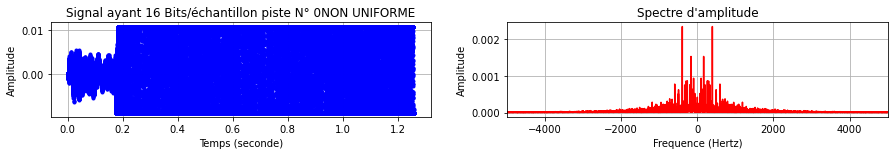

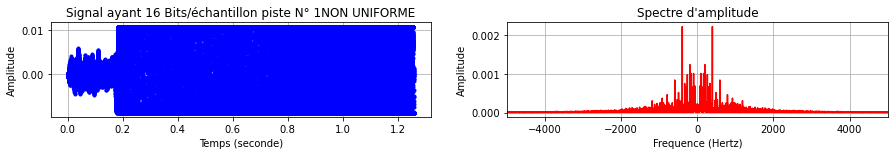

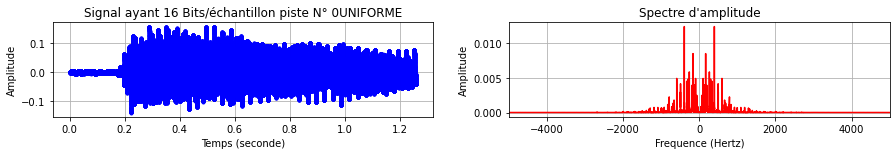

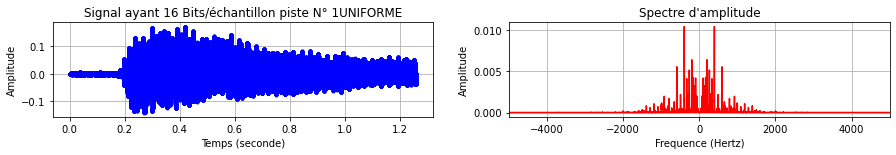

In [224]:
S_non_uniform, S_uniform = QuantifMoins(Son,16)
print('#########################SIGNAL NON UNIFORME#############################\n', info(S_non_uniform))
print('#########################SIGNAL UNIFORME#############################\n', info(S_uniform))
ipd.Audio(S_non_uniform) # A MODIFIER SELON VOTRE BESOIN D'ÉCOUTE

In [226]:
ipd.Audio(S_non_uniform) # Jouer le son non uniforme

In [227]:
ipd.Audio(S_uniform) # Jouer le son uniforme 

### Pour obtenir un seul fichier, il faut réecrire le même nom a chaque input

In [245]:
def HDtoSD(Son,debut,fin,Fmoins,Bits):
    print('\n###################### INFORMATION DU SON ######################\n')
    LaTotale(Son)
    Extrait = extract(Son,debut,fin)
    print('\n################### INFORMATION DE L\'EXTRAIT ##################\n')
    print(Extrait)
    Sous_Ech_Extrait = EchantsMoins(Extrait,Fmoins)
    print('\n######### INFORMATION DE L\'EXTRAIT SOUS ÉCHANTILLONNER ########\n')
    print(Sous_Ech_Extrait)
    Extrait_final = QuantifMoins(Sous_Ech_Extrait,Bits)
    print('\n################### NOM DES FICHIER FINALES ####################\n')
    print('le fichier HD passée en SD se nomme :', Extrait_final[0] , ' OU ', Extrait_final[1])
    print('\n########## INFORMATION DU FICHIER FINALE NON UNIFORME ##########\n')
    print(info(Extrait_final[0]))
    print('\n############ INFORMATION DU FICHIER FINALE UNIFORME ############\n')
    print(info(Extrait_final[1]))
    return Extrait_final[0], Extrait_final[1] 


###################### INFORMATION DU SON ######################

NY_HDsample_mini.flac
samplerate: 96000 Hz
channels: 2
duration: 1.259 s
format: FLAC (Free Lossless Audio Codec) [FLAC]
subtype: Signed 24 bit PCM [PCM_24]
FLAC 

Le nombre de bits par échantillon est de type  PCM_24
La fréquence d'échantillonage est de 96000 Hz
Le nombre de piste est de : 2
Le nombre d'echantillon est de 120843
Le fichier a donc une durée de : 1.25878125 secondes
Nom du fichier qui sera crée (Extrait): 
h

Le fichier extrait se nomme : h.flac
h.flac
samplerate: 96000 Hz
channels: 2
duration: 96000 samples
format: FLAC (Free Lossless Audio Codec) [FLAC]
subtype: Signed 16 bit PCM [PCM_16]

################### INFORMATION DE L'EXTRAIT ##################

h.flac
Nom du fichier qui sera crée (Sous-échantilllonage) : 
h

 Echantillons utilisés :  48000
Le fichier sous echantilloné se nomme : h.flac
h.flac
samplerate: 48000 Hz
channels: 2
duration: 48000 samples
format: FLAC (Free Lossless Audio Codec) [FLA

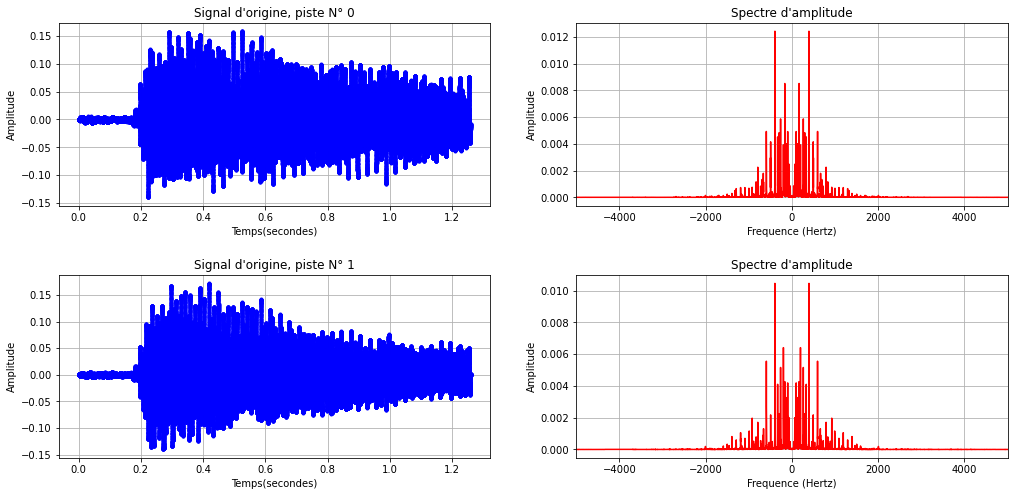

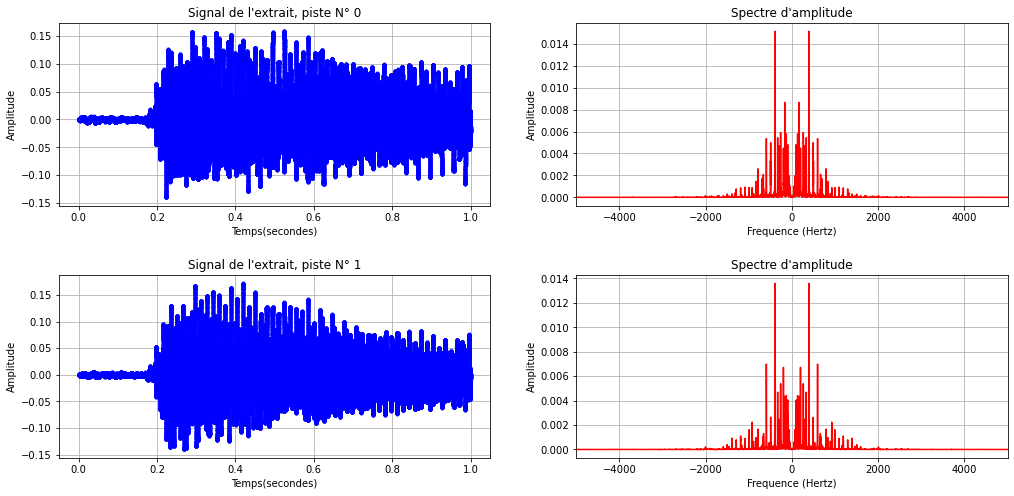

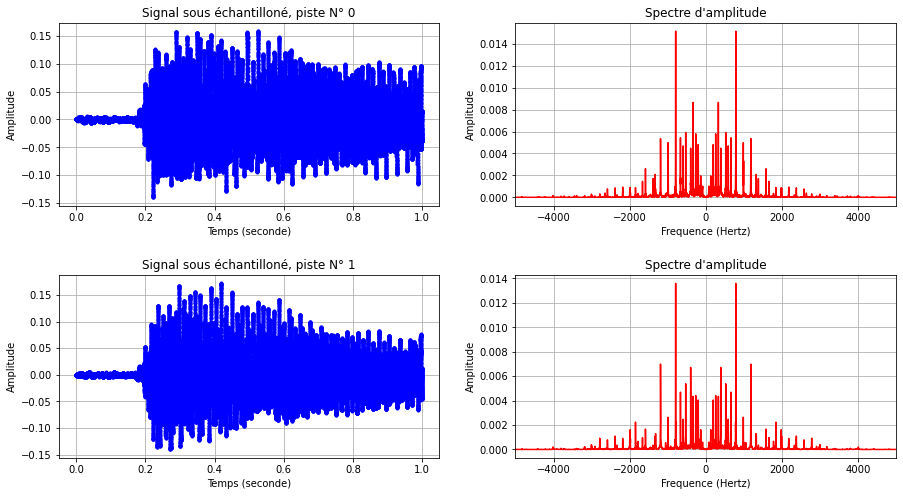

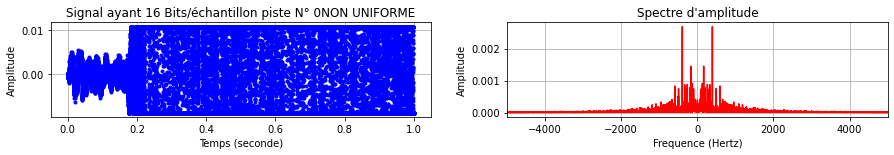

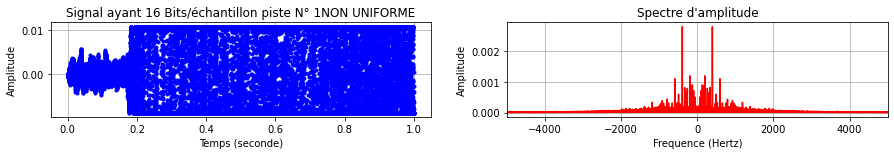

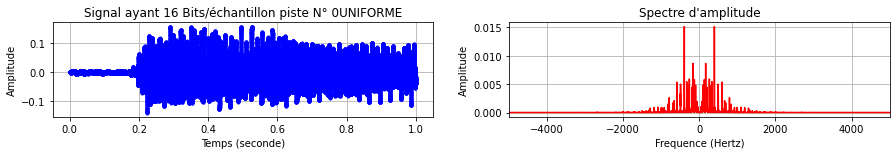

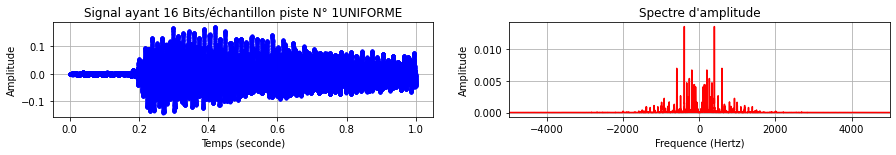

In [246]:
final = HDtoSD(Son,0,1,2,16) 
print(final[0])
print(final[1])
ipd.Audio(final[1])